# Multiple Linear Regression


## Bike Sharing Case Study



###  Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### Business Objective

The business objective of the case study is to build a multiple linear regression model for the prediction of demand for shared bikes.We need to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. To understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands



***Steps in this case study are as follows:***
1. Reading and Understanding Data
2. Visualizing Data
3. Data cleanup, Data preparation and EDA
4. Splitting the data into train and test sets
5. Rescaling the Features
6. Training the model
7. Residual analysis
8. Predictions and evaluation of the Model


## Step 1. Reading, Understanding and Visualizing Data

### Step 1.1. Import Libraries

In [69]:
# Import all necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import calendar

import warnings
warnings.filterwarnings('ignore')


from math import sqrt

### Step 1.2. Read and Understand the "day" dataset

In [2]:
# Read data
bike_sharing=pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Shape
bike_sharing.shape

(730, 16)

In [4]:
# info, checking for Null values
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Describe
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2. Data Visualization

#### Step 2.1. Visualising Numerical variables

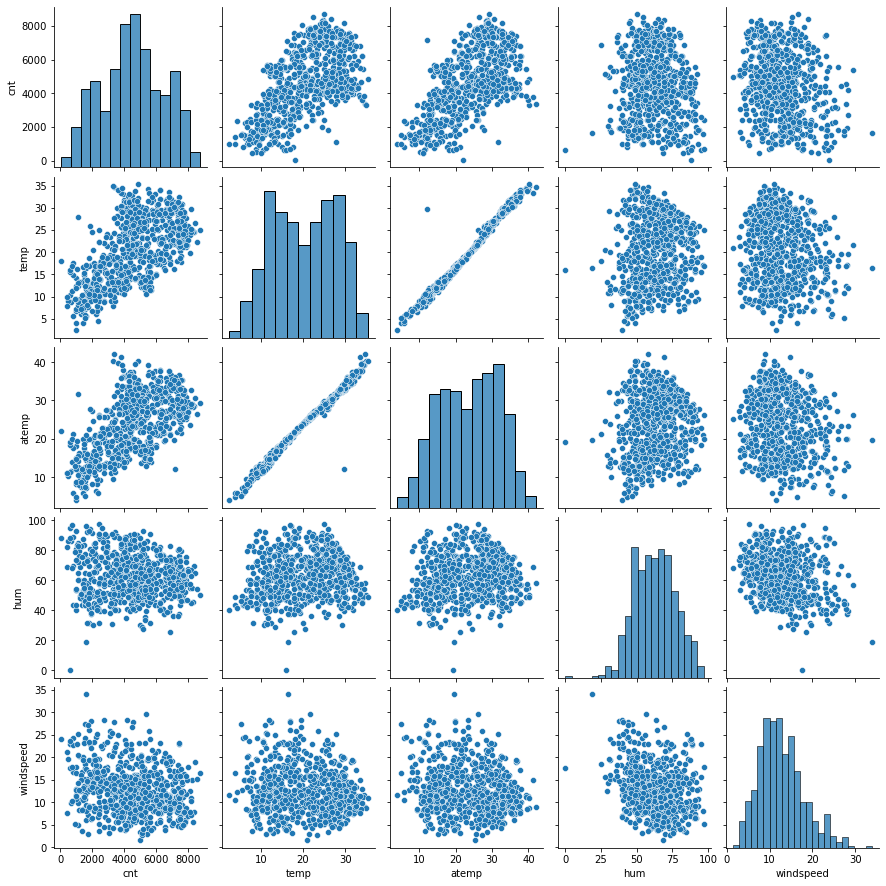

In [82]:
# Let's visualize numeric variables of df bike_sharing
sns.pairplot(data=bike_sharing,vars=['cnt','temp', 'atemp', 'hum', 'windspeed'])
plt.show()

#### Step 2.2. Visualising Categoricl variables

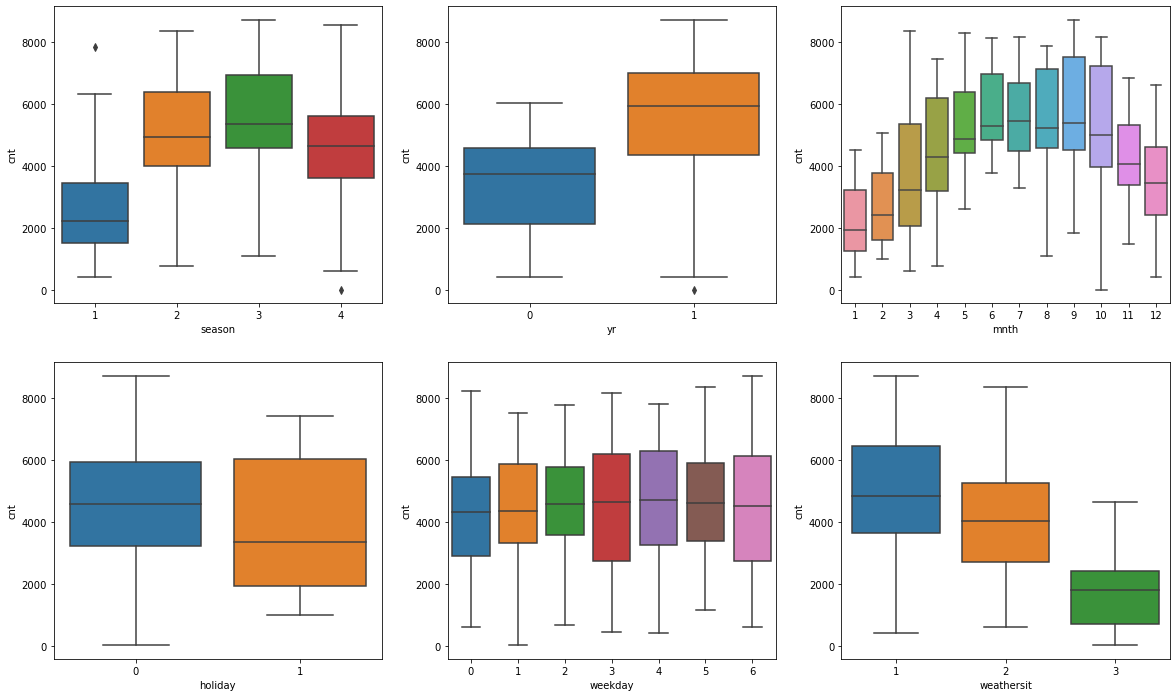

In [7]:
# Let's Visualize Categorical Variables
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike_sharing)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_sharing)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_sharing)

plt.subplot(2,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike_sharing)

plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike_sharing)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_sharing)

plt.show()

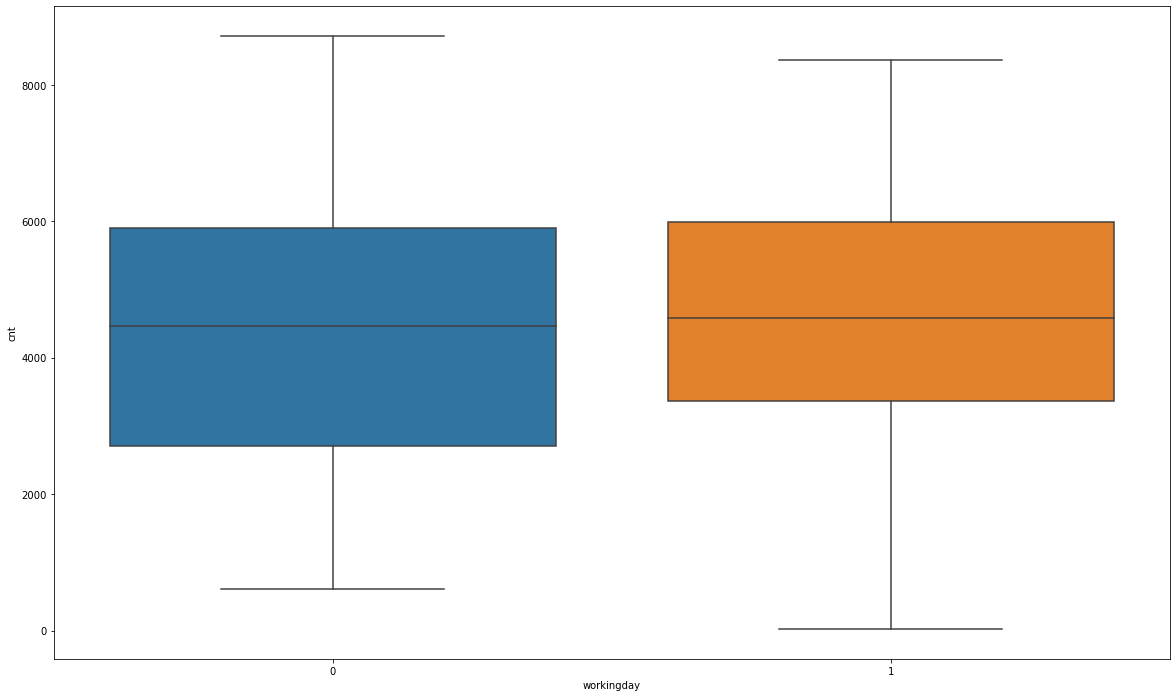

In [8]:
plt.figure(figsize=(20,12))
sns.boxplot(x='workingday',y='cnt',data=bike_sharing)
plt.show()

**Conclusion**:<br>
1. During Spring, bike sharing is very less
2. In 2019, bike sharing is increased
3. Bike sharing is in peak during the months April, May, June, July, Aug, September, October months
4. Bike sharing is very less during holidays
5. Bike sharing is zero for weather situation: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" (Category :4)
6. Bike sharing is more for weather situation:"Clear, Few clouds, Partly cloudy, Partly cloudy" (Category:1)
7. Bike sharing is more during "fall" season (category 3)

### Step 3. Data cleanup, Data preparation and EDA


In [9]:
# Let's drop the columns that are not relevant for the model
bike_sharing.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Let's convert the numeric values of categoricl variables to categorical data mnth, season, weathersit, weekday
bike_sharing['mnth']=bike_sharing['mnth'].apply(lambda x: calendar.month_abbr[x])

In [11]:
# Conevrting numeric values of season to categorical data
bike_sharing['season']=bike_sharing['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})


In [12]:
# Conevrting numeric values of weathersit to categorical data
bike_sharing['weathersit']=bike_sharing['weathersit'].map({1:'Clear', 2:'Mist & Cloudy', 3:'Light Snow & Rain', 4:'Heavy Snow & Rain'})

In [13]:
# Conevrting numeric values of weathersit to categorical data
bike_sharing['weekday']=bike_sharing['weekday'].map({0:'Sunday',1:'Monday', 2:'Teusday', 3:'Wednesday', 4:'Thusday',5:'Friday',6:'Friday'})

In [14]:
# Let's check our df if it is updated properly or nt
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Friday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Teusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Dummy Variables

In [16]:
# Let's add dummy variables to the variables
bike_dummy=pd.get_dummies(bike_sharing[['season','mnth','weekday','weathersit']],drop_first=True)

In [17]:
# Concatenate dummy df bike_dummy with original df bike_sharing
bike_sharing=pd.concat([bike_sharing,bike_dummy], axis=1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Sunday,weekday_Teusday,weekday_Thusday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,Spring,0,Jan,0,Friday,0,Mist & Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,1,0,0,0,0,0,0
3,Spring,0,Jan,0,Teusday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# Let's drop the redundant columns
bike_sharing.drop(['season', 'mnth', 'weekday','weathersit'], axis=1, inplace=True)
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Sunday,weekday_Teusday,weekday_Thusday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


### Step 4. Splitting the data into train and test sets

In [19]:
df_train,df_test=train_test_split(bike_sharing, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Step 5. Rescaling the Features

In [20]:
# Instantiate object
scaler=MinMaxScaler()

In [21]:
# Apply scaler to all numeric variables except dummy variables
num_varlist= ['cnt','temp','atemp','hum','windspeed']

# Fit Transform
df_train[num_varlist]=scaler.fit_transform(df_train[num_varlist])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Sunday,weekday_Teusday,weekday_Thusday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [22]:
# Describe df_train
df_train[num_varlist].describe()

,cnt,temp,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513499,0.537440,0.513156,0.650480,0.320883
std,0.224421,0.225858,0.212410,0.145846,0.169803
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.339853,0.332086,0.538643,0.199179
50%,0.518638,0.542596,0.529718,0.653714,0.296763
75%,0.684710,0.735215,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000,1.000000


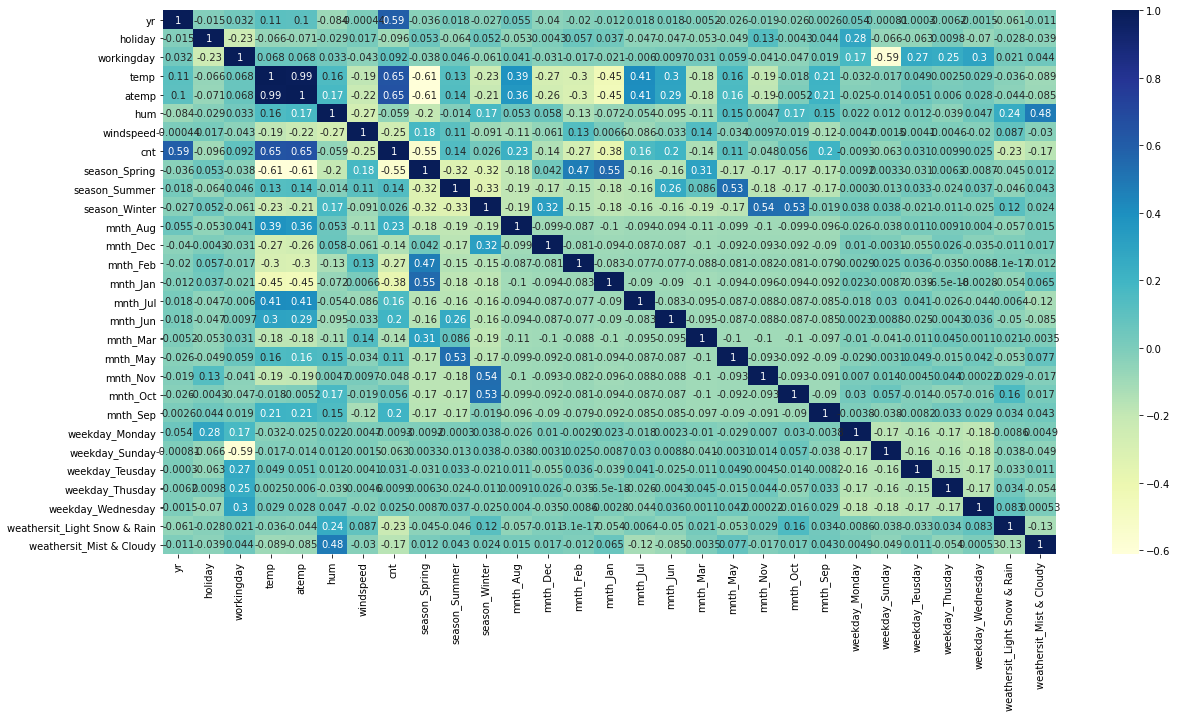

In [23]:
# Let's check the correlation among the variables
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

### Step 6. Training the Model

In [24]:
# Let's divide training data into X and y sets for building the model
y_train=df_train.pop('cnt')
X_train=df_train

In [25]:
# Running RFE with output number of variables equal to 25
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,25) # Running RFE
rfe=rfe.fit(X_train,y_train)


In [26]:
# Columns selected by RFE nd their weights
rfe_df=pd.DataFrame({'Predictor':X_train.columns,'Status':rfe.support_,'Ranking':rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Status,Ranking
0,yr,True,1
24,weekday_Thusday,True,1
23,weekday_Teusday,True,1
22,weekday_Sunday,True,1
21,weekday_Monday,True,1
20,mnth_Sep,True,1
19,mnth_Oct,True,1
18,mnth_Nov,True,1
17,mnth_May,True,1
15,mnth_Jun,True,1


In [27]:
# Print the columns selected by RFE
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'weekday_Monday', 'weekday_Sunday', 'weekday_Teusday',
       'weekday_Thusday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [28]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Mar', 'weekday_Wednesday'], dtype='object')

#### Building model using statsmodel for detailed statistics

#### Model - 1

In [29]:
#  Creating X_train dataframe with RFE selected variables
X_train_rfe=X_train[col]

In [30]:
# Adding constant variables
X_train_lm=sm.add_constant(X_train_rfe)

In [31]:
# Let's create the linear model
lr=sm.OLS(y_train,X_train_lm)
lm=lr.fit()

In [225]:
# Let's see summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.69e-183
Time:                        00:25:27   Log-Likelihood:                 527.02
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

##### From the above model, we could see that p-value of "mnth_Oct" is greater than 0.05. Which makes it's coefficient insignificant. <br>  Let's drop this column and rebuild the model 

#### Model - 2

In [32]:
col=col.drop(['mnth_Oct'])
X_train_rfe=X_train[col]
X_train_lm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_lm)
lm=lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.52e-184
Time:                        17:22:39   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3404      0.040      8.589      0.000       0.262       0.418
yr                               0.2324      0.008     28.925      0.000       0.217       0.248
holiday                         -0.0847      0.027     -3.195      0.001      -0.137      -0.033
temp                             0.3900      0.141      2.762      0.006       0.113       0.667
atemp                            0.0566      0.137      0.412      0.680      -0.213       0.327
hum                             -0.1518      0.038     -3.982      0.000      -0.227      -0.077
windspeed                       -0.1834      0.026     -7.005      0.000      -0.235      -0.132
season_Spring                   -0.0461      0.028     -1.662      0.097      -0.101       0.008
season_Summer                    0.0399      0.024      1.685      0.093      -0.007       0.086
season_Winter                    0.1103      0.024      4.557      0.000       0.063       0.158
mnth_Aug                         0.0191      0.029      0.651      0.516      -0.039       0.077
mnth_Dec                        -0.0494      0.018     -2.686      0.007      -0.086      -0.013
mnth_Feb                        -0.0350      0.022     -1.616      0.107      -0.078       0.008
mnth_Jan                        -0.0658      0.022     -3.021      0.003      -0.109      -0.023
mnth_Jul                        -0.0356      0.031     -1.153      0.250      -0.096       0.025
mnth_Jun                         0.0041      0.023      0.181      0.856      -0.041       0.049
mnth_May                         0.0245      0.020      1.249      0.212      -0.014       0.063
mnth_Nov                        -0.0466      0.019     -2.453      0.015      -0.084      -0.009
mnth_Sep                         0.0826      0.025      3.342      0.001       0.034       0.131
weekday_Monday                  -0.0192      0.012     -1.570      0.117      -0.043       0.005
weekday_Sunday                  -0.0527      0.012     -4.384      0.000      -0.076      -0.029
weekday_Teusday                 -0.0160      0.012     -1.290      0.198      -0.040       0.008
weekday_Thusday                 -0.0072      0.012     -0.583      0.560      -0.031       0.017
weathersit_Light Snow & Rain    -0.2555      0.026     -9.719      0.000      -0.307      -0.204
weathersit_Mist & Cloudy        -0.0593      0.010     -5.721      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       82.461   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.307
Skew:                          -0.787   Prob(JB):                     2.65e-50
Kurtosis:                       5.875   Cond. No.  

##### From the above model, we could see that p-value of "mnth_Jun" is greater than 0.05. Which makes it's coefficient insignificant. <br>  Let's drop this column and rebuild the model

#### Model - 3

In [33]:
col=col.drop(['mnth_Jun'])
X_train_rfe=X_train[col]
X_train_lm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_lm)
lm=lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.29e-185
Time:                        17:24:41   Log-Likelihood:                 526.98
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3407      0.040      8.617      0.000       0.263       0.418
yr                               0.2322      0.008     29.063      0.000       0.217       0.248
holiday                         -0.0851      0.026     -3.224      0.001      -0.137      -0.033
temp                             0.3975      0.135      2.949      0.003       0.133       0.662
atemp                            0.0533      0.136      0.392      0.695      -0.214       0.321
hum                             -0.1527      0.038     -4.045      0.000      -0.227      -0.079
windspeed                       -0.1840      0.026     -7.097      0.000      -0.235      -0.133
season_Spring                   -0.0474      0.027     -1.776      0.076      -0.100       0.005
season_Summer                    0.0392      0.023      1.679      0.094      -0.007       0.085
season_Winter                    0.1088      0.023      4.776      0.000       0.064       0.154
mnth_Aug                         0.0159      0.024      0.674      0.501      -0.031       0.062
mnth_Dec                        -0.0489      0.018     -2.690      0.007      -0.085      -0.013
mnth_Feb                        -0.0345      0.021     -1.608      0.108      -0.077       0.008
mnth_Jan                        -0.0649      0.021     -3.057      0.002      -0.107      -0.023
mnth_Jul                        -0.0390      0.025     -1.583      0.114      -0.087       0.009
mnth_May                         0.0228      0.017      1.318      0.188      -0.011       0.057
mnth_Nov                        -0.0463      0.019     -2.449      0.015      -0.083      -0.009
mnth_Sep                         0.0804      0.021      3.751      0.000       0.038       0.122
weekday_Monday                  -0.0191      0.012     -1.569      0.117      -0.043       0.005
weekday_Sunday                  -0.0527      0.012     -4.387      0.000      -0.076      -0.029
weekday_Teusday                 -0.0160      0.012     -1.297      0.195      -0.040       0.008
weekday_Thusday                 -0.0072      0.012     -0.589      0.556      -0.031       0.017
weathersit_Light Snow & Rain    -0.2555      0.026     -9.728      0.000      -0.307      -0.204
weathersit_Mist & Cloudy        -0.0592      0.010     -5.725      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       82.081   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.741
Skew:                          -0.786   Prob(JB):                     9.57e-50
Kurtosis:                       5.856   Cond. No.                         81.8
=====================================================================

##### From the above model, we could see that p-value of "atemp" is greater than 0.05. Which makes it's coefficient insignificant. <br>  Let's drop this column and rebuild the model

#### Model - 4

In [34]:
col=col.drop(['atemp'])
X_train_rfe=X_train[col]
X_train_lm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_lm)
lm=lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.16e-186
Time:                        17:29:04   Log-Likelihood:                 526.90
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3404      0.039      8.619      0.000       0.263       0.418
yr                               0.2322      0.008     29.086      0.000       0.217       0.248
holiday                         -0.0857      0.026     -3.255      0.001      -0.137      -0.034
temp                             0.4482      0.038     11.684      0.000       0.373       0.524
hum                             -0.1519      0.038     -4.034      0.000      -0.226      -0.078
windspeed                       -0.1860      0.025     -7.324      0.000      -0.236      -0.136
season_Spring                   -0.0466      0.027     -1.753      0.080      -0.099       0.006
season_Summer                    0.0401      0.023      1.725      0.085      -0.006       0.086
season_Winter                    0.1097      0.023      4.846      0.000       0.065       0.154
mnth_Aug                         0.0152      0.024      0.646      0.518      -0.031       0.062
mnth_Dec                        -0.0489      0.018     -2.689      0.007      -0.085      -0.013
mnth_Feb                        -0.0345      0.021     -1.612      0.108      -0.077       0.008
mnth_Jan                        -0.0651      0.021     -3.071      0.002      -0.107      -0.023
mnth_Jul                        -0.0390      0.025     -1.585      0.114      -0.087       0.009
mnth_May                         0.0225      0.017      1.305      0.192      -0.011       0.056
mnth_Nov                        -0.0462      0.019     -2.448      0.015      -0.083      -0.009
mnth_Sep                         0.0804      0.021      3.757      0.000       0.038       0.122
weekday_Monday                  -0.0188      0.012     -1.546      0.123      -0.043       0.005
weekday_Sunday                  -0.0526      0.012     -4.381      0.000      -0.076      -0.029
weekday_Teusday                 -0.0158      0.012     -1.283      0.200      -0.040       0.008
weekday_Thusday                 -0.0070      0.012     -0.568      0.571      -0.031       0.017
weathersit_Light Snow & Rain    -0.2563      0.026     -9.791      0.000      -0.308      -0.205
weathersit_Mist & Cloudy        -0.0593      0.010     -5.738      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       81.449   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.891
Skew:                          -0.780   Prob(JB):                     2.41e-49
Kurtosis:                       5.847   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctl

##### From the above model, we could see that p-value of "weekday_Thusday" is greater than 0.05. Which makes it's coefficient insignificant. <br>  Let's drop this column and rebuild the model

#### Model - 5

In [35]:
col=col.drop(['weekday_Thusday'])
X_train_rfe=X_train[col]
X_train_lm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_lm)
lm=lr.fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.2
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.16e-187
Time:                        17:30:02   Log-Likelihood:                 526.73
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3384      0.039      8.609      0.000       0.261       0.416
yr                               0.2322      0.008     29.102      0.000       0.216       0.248
holiday                         -0.0863      0.026     -3.284      0.001      -0.138      -0.035
temp                             0.4481      0.038     11.690      0.000       0.373       0.523
hum                             -0.1519      0.038     -4.034      0.000      -0.226      -0.078
windspeed                       -0.1859      0.025     -7.324      0.000      -0.236      -0.136
season_Spring                   -0.0463      0.027     -1.744      0.082      -0.099       0.006
season_Summer                    0.0405      0.023      1.744      0.082      -0.005       0.086
season_Winter                    0.1103      0.023      4.882      0.000       0.066       0.155
mnth_Aug                         0.0156      0.024      0.663      0.508      -0.031       0.062
mnth_Dec                        -0.0492      0.018     -2.710      0.007      -0.085      -0.014
mnth_Feb                        -0.0342      0.021     -1.601      0.110      -0.076       0.008
mnth_Jan                        -0.0651      0.021     -3.070      0.002      -0.107      -0.023
mnth_Jul                        -0.0384      0.025     -1.566      0.118      -0.087       0.010
mnth_May                         0.0225      0.017      1.305      0.193      -0.011       0.056
mnth_Nov                        -0.0469      0.019     -2.488      0.013      -0.084      -0.010
mnth_Sep                         0.0805      0.021      3.761      0.000       0.038       0.123
weekday_Monday                  -0.0171      0.012     -1.453      0.147      -0.040       0.006
weekday_Sunday                  -0.0510      0.012     -4.372      0.000      -0.074      -0.028
weekday_Teusday                 -0.0143      0.012     -1.186      0.236      -0.038       0.009
weathersit_Light Snow & Rain    -0.2565      0.026     -9.807      0.000      -0.308      -0.205
weathersit_Mist & Cloudy        -0.0590      0.010     -5.722      0.000      -0.079      -0.039
==============================================================================
Omnibus:                       81.322   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.340
Skew:                          -0.776   Prob(JB):                     1.17e-49
Kurtosis:                       5.863   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From the above model, we could see that p-value of "mnth_Aug" is greater than 0.05. Which makes it's coefficient insignificant. <br>  Let's drop this column and rebuild the model

#### Model - 6

In [36]:
col=col.drop(['mnth_Aug'])
X_train_rfe=X_train[col]
X_train_lm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_lm)
lm=lr.fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.0
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.23e-188
Time:                        17:31:00   Log-Likelihood:                 526.50
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -922.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3472      0.037      9.394      0.000       0.275       0.420
yr                               0.2323      0.008     29.150      0.000       0.217       0.248
holiday                         -0.0867      0.026     -3.298      0.001      -0.138      -0.035
temp                             0.4499      0.038     11.774      0.000       0.375       0.525
hum                             -0.1507      0.038     -4.011      0.000      -0.225      -0.077
windspeed                       -0.1860      0.025     -7.334      0.000      -0.236      -0.136
season_Spring                   -0.0563      0.022     -2.576      0.010      -0.099      -0.013
season_Summer                    0.0299      0.017      1.773      0.077      -0.003       0.063
season_Winter                    0.1011      0.018      5.684      0.000       0.066       0.136
mnth_Dec                        -0.0500      0.018     -2.760      0.006      -0.086      -0.014
mnth_Feb                        -0.0342      0.021     -1.602      0.110      -0.076       0.008
mnth_Jan                        -0.0651      0.021     -3.071      0.002      -0.107      -0.023
mnth_Jul                        -0.0495      0.018     -2.761      0.006      -0.085      -0.014
mnth_May                         0.0222      0.017      1.285      0.199      -0.012       0.056
mnth_Nov                        -0.0479      0.019     -2.552      0.011      -0.085      -0.011
mnth_Sep                         0.0715      0.017      4.306      0.000       0.039       0.104
weekday_Monday                  -0.0173      0.012     -1.469      0.142      -0.040       0.006
weekday_Sunday                  -0.0512      0.012     -4.395      0.000      -0.074      -0.028
weekday_Teusday                 -0.0142      0.012     -1.180      0.238      -0.038       0.009
weathersit_Light Snow & Rain    -0.2574      0.026     -9.858      0.000      -0.309      -0.206
weathersit_Mist & Cloudy        -0.0588      0.010     -5.705      0.000      -0.079      -0.039
==============================================================================
Omnibus:                       82.419   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.335
Skew:                          -0.786   Prob(JB):                     2.62e-50
Kurtosis:                       5.876   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From the above model, we could see that p-value of "weekday_Teusday" is greater than 0.05. Which makes it's coefficient insignificant. <br>  Let's drop this column and rebuild the model

#### Model - 7

In [37]:
col=col.drop(['weekday_Teusday'])
X_train_rfe=X_train[col]
X_train_lm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_lm)
lm=lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.3
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          3.60e-189
Time:                        17:32:25   Log-Likelihood:                 525.78
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -926.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3458      0.037      9.356      0.000       0.273       0.418
yr                               0.2322      0.008     29.129      0.000       0.217       0.248
holiday                         -0.0860      0.026     -3.272      0.001      -0.138      -0.034
temp                             0.4500      0.038     11.772      0.000       0.375       0.525
hum                             -0.1525      0.038     -4.058      0.000      -0.226      -0.079
windspeed                       -0.1863      0.025     -7.342      0.000      -0.236      -0.136
season_Spring                   -0.0561      0.022     -2.562      0.011      -0.099      -0.013
season_Summer                    0.0297      0.017      1.759      0.079      -0.003       0.063
season_Winter                    0.1008      0.018      5.663      0.000       0.066       0.136
mnth_Dec                        -0.0491      0.018     -2.712      0.007      -0.085      -0.014
mnth_Feb                        -0.0355      0.021     -1.662      0.097      -0.077       0.006
mnth_Jan                        -0.0650      0.021     -3.065      0.002      -0.107      -0.023
mnth_Jul                        -0.0504      0.018     -2.813      0.005      -0.086      -0.015
mnth_May                         0.0217      0.017      1.257      0.209      -0.012       0.056
mnth_Nov                        -0.0479      0.019     -2.551      0.011      -0.085      -0.011
mnth_Sep                         0.0718      0.017      4.317      0.000       0.039       0.104
weekday_Monday                  -0.0147      0.012     -1.271      0.204      -0.037       0.008
weekday_Sunday                  -0.0484      0.011     -4.243      0.000      -0.071      -0.026
weathersit_Light Snow & Rain    -0.2556      0.026     -9.802      0.000      -0.307      -0.204
weathersit_Mist & Cloudy        -0.0585      0.010     -5.678      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       81.596   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.550
Skew:                          -0.768   Prob(JB):                     1.93e-51
Kurtosis:                       5.938   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From the above model, we could see that p-value of "weekday_Monday" is greater than 0.05. Which makes it's coefficient insignificant. <br>  Let's drop this column and rebuild the model

#### Model - 8

In [38]:
col=col.drop(['weekday_Monday'])
X_train_rfe=X_train[col]
X_train_lm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_lm)
lm=lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.2
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          6.33e-190
Time:                        17:33:04   Log-Likelihood:                 524.94
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3436      0.037      9.302      0.000       0.271       0.416
yr                               0.2315      0.008     29.092      0.000       0.216       0.247
holiday                         -0.0952      0.025     -3.769      0.000      -0.145      -0.046
temp                             0.4523      0.038     11.840      0.000       0.377       0.527
hum                             -0.1550      0.038     -4.129      0.000      -0.229      -0.081
windspeed                       -0.1864      0.025     -7.343      0.000      -0.236      -0.137
season_Spring                   -0.0550      0.022     -2.514      0.012      -0.098      -0.012
season_Summer                    0.0297      0.017      1.756      0.080      -0.004       0.063
season_Winter                    0.1005      0.018      5.643      0.000       0.065       0.135
mnth_Dec                        -0.0485      0.018     -2.677      0.008      -0.084      -0.013
mnth_Feb                        -0.0354      0.021     -1.659      0.098      -0.077       0.007
mnth_Jan                        -0.0651      0.021     -3.071      0.002      -0.107      -0.023
mnth_Jul                        -0.0507      0.018     -2.829      0.005      -0.086      -0.015
mnth_May                         0.0223      0.017      1.291      0.197      -0.012       0.056
mnth_Nov                        -0.0464      0.019     -2.476      0.014      -0.083      -0.010
mnth_Sep                         0.0724      0.017      4.355      0.000       0.040       0.105
weekday_Sunday                  -0.0460      0.011     -4.085      0.000      -0.068      -0.024
weathersit_Light Snow & Rain    -0.2546      0.026     -9.761      0.000      -0.306      -0.203
weathersit_Mist & Cloudy        -0.0581      0.010     -5.640      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       79.414   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.489
Skew:                          -0.744   Prob(JB):                     1.47e-50
Kurtosis:                       5.930   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From the above model, we could see that p-value of "mnth_May" is greater than 0.05. Which makes it's coefficient insignificant. <br>  Let's drop this column and rebuild the model

#### Model - 9

In [39]:
col=col.drop(['mnth_May'])
X_train_rfe=X_train[col]
X_train_lm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_lm)
lm=lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.1
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.11e-190
Time:                        17:33:39   Log-Likelihood:                 524.07
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3337      0.036      9.230      0.000       0.263       0.405
yr                               0.2310      0.008     29.045      0.000       0.215       0.247
holiday                         -0.0960      0.025     -3.799      0.000      -0.146      -0.046
temp                             0.4611      0.038     12.252      0.000       0.387       0.535
hum                             -0.1490      0.037     -3.997      0.000      -0.222      -0.076
windspeed                       -0.1881      0.025     -7.415      0.000      -0.238      -0.138
season_Spring                   -0.0513      0.022     -2.364      0.018      -0.094      -0.009
season_Summer                    0.0392      0.015      2.580      0.010       0.009       0.069
season_Winter                    0.1025      0.018      5.773      0.000       0.068       0.137
mnth_Dec                        -0.0471      0.018     -2.607      0.009      -0.083      -0.012
mnth_Feb                        -0.0341      0.021     -1.595      0.111      -0.076       0.008
mnth_Jan                        -0.0635      0.021     -2.998      0.003      -0.105      -0.022
mnth_Jul                        -0.0512      0.018     -2.853      0.005      -0.086      -0.016
mnth_Nov                        -0.0448      0.019     -2.393      0.017      -0.082      -0.008
mnth_Sep                         0.0724      0.017      4.352      0.000       0.040       0.105
weekday_Sunday                  -0.0460      0.011     -4.085      0.000      -0.068      -0.024
weathersit_Light Snow & Rain    -0.2563      0.026     -9.837      0.000      -0.308      -0.205
weathersit_Mist & Cloudy        -0.0583      0.010     -5.654      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       77.286   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.526
Skew:                          -0.744   Prob(JB):                     1.93e-46
Kurtosis:                       5.774   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From the above model, we could see that p-value of "mnth_Feb" is greater than 0.05. Which makes it's coefficient insignificant. <br>  Let's drop this column and rebuild the model

#### Model - 10

In [40]:
col=col.drop(['mnth_Feb'])
X_train_rfe=X_train[col]
X_train_lm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_lm)
lm=lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.7
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.92e-191
Time:                        17:35:30   Log-Likelihood:                 522.76
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     493   BIC:                            -939.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3225      0.036      9.079      0.000       0.253       0.392
yr                               0.2306      0.008     28.966      0.000       0.215       0.246
holiday                         -0.0984      0.025     -3.894      0.000      -0.148      -0.049
temp                             0.4762      0.036     13.059      0.000       0.405       0.548
hum                             -0.1509      0.037     -4.043      0.000      -0.224      -0.078
windspeed                       -0.1869      0.025     -7.360      0.000      -0.237      -0.137
season_Spring                   -0.0607      0.021     -2.898      0.004      -0.102      -0.020
season_Summer                    0.0424      0.015      2.807      0.005       0.013       0.072
season_Winter                    0.1041      0.018      5.869      0.000       0.069       0.139
mnth_Dec                        -0.0384      0.017     -2.223      0.027      -0.072      -0.004
mnth_Jan                        -0.0453      0.018     -2.534      0.012      -0.080      -0.010
mnth_Jul                        -0.0521      0.018     -2.901      0.004      -0.087      -0.017
mnth_Nov                        -0.0402      0.019     -2.169      0.031      -0.077      -0.004
mnth_Sep                         0.0738      0.017      4.438      0.000       0.041       0.107
weekday_Sunday                  -0.0463      0.011     -4.105      0.000      -0.068      -0.024
weathersit_Light Snow & Rain    -0.2550      0.026     -9.777      0.000      -0.306      -0.204
weathersit_Mist & Cloudy        -0.0581      0.010     -5.620      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       72.694   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.447
Skew:                          -0.701   Prob(JB):                     1.33e-43
Kurtosis:                       5.707   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion 1**<br>
From the above Model, we can conclude that p-values of respective features are less thn 0.05.<br> In other words,p-vlues of respective features are under allowed threshold limit. 

#### Checking VIF for multicollinearity

In [41]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.17
2,temp,17.81
4,windspeed,4.73
5,season_Spring,4.37
7,season_Winter,4.07
6,season_Summer,2.82
15,weathersit_Mist & Cloudy,2.34
0,yr,2.09
11,mnth_Nov,1.85
9,mnth_Jan,1.75


#### As per rule, we would need VIF value less than 5.From the above, we could see that "hum" and "temp" have VIF values more than 5. Let's drop "hum" first and recalculate the VIFs.

In [46]:
### dropping hum from the model
col=col.drop(['hum'])
X_train_rfe=X_train[col]

In [47]:
# Calculate the VIFs for the model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,5.22
3,windspeed,4.67
6,season_Winter,2.98
4,season_Spring,2.92
5,season_Summer,2.25
0,yr,2.07
10,mnth_Nov,1.81
8,mnth_Jan,1.66
9,mnth_Jul,1.60
14,weathersit_Mist & Cloudy,1.57


#### From the above, we could see that VIF of "temp" is greater than 5. Which makes it's coefficient insignificant. Let's drop "temp" and recalculate the VIFs

In [48]:
# Drop temp
col=col.drop(['temp'])
X_train_rfe=X_train[col]

#### Model - 11

In [50]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train,X_train_lm)
lm = lr.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.8
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          9.48e-162
Time:                        18:06:33   Log-Likelihood:                 446.90
No. Observations:                 510   AIC:                            -863.8
Df Residuals:                     495   BIC:                            -800.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.6024      0.016     38.225      0.000       0.571       0.633
yr                               0.2456      0.009     26.996      0.000       0.228       0.263
holiday                         -0.0937      0.029     -3.202      0.001      -0.151      -0.036
windspeed                       -0.1904      0.028     -6.768      0.000      -0.246      -0.135
season_Spring                   -0.2478      0.017    -14.182      0.000      -0.282      -0.213
season_Summer                   -0.0486      0.015     -3.135      0.002      -0.079      -0.018
season_Winter                   -0.0187      0.017     -1.076      0.282      -0.053       0.015
mnth_Dec                        -0.1109      0.019     -5.862      0.000      -0.148      -0.074
mnth_Jan                        -0.1213      0.020     -6.204      0.000      -0.160      -0.083
mnth_Jul                        -0.0153      0.021     -0.745      0.456      -0.056       0.025
mnth_Nov                        -0.1007      0.021     -4.861      0.000      -0.141      -0.060
mnth_Sep                         0.0522      0.019      2.728      0.007       0.015       0.090
weekday_Sunday                  -0.0519      0.013     -3.985      0.000      -0.078      -0.026
weathersit_Light Snow & Rain    -0.3176      0.028    -11.515      0.000      -0.372      -0.263
weathersit_Mist & Cloudy        -0.0891      0.010     -9.138      0.000      -0.108      -0.070
==============================================================================
Omnibus:                       61.577   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.557
Skew:                          -0.613   Prob(JB):                     6.12e-35
Kurtosis:                       5.431   Cond. No.                         9.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the above model, we could see that p-value of "mnth_Jul" and "season_Winter" is greater than 0.05. Which makes it's coefficient insignificant. Let's drop mnth_Jul first and rebuild the model

#### Model - 12

In [52]:
col=col.drop(['mnth_Jul'])
X_train_rfe=X_train[col]
X_train_lm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_lm)
lm=lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          9.98e-163
Time:                        18:22:14   Log-Likelihood:                 446.61
No. Observations:                 510   AIC:                            -865.2
Df Residuals:                     496   BIC:                            -805.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5967      0.014     43.237      0.000       0.570       0.624
yr                               0.2456      0.009     27.017      0.000       0.228       0.264
holiday                         -0.0935      0.029     -3.196      0.001      -0.151      -0.036
windspeed                       -0.1903      0.028     -6.767      0.000      -0.246      -0.135
season_Spring                   -0.2424      0.016    -15.256      0.000      -0.274      -0.211
season_Summer                   -0.0431      0.014     -3.158      0.002      -0.070      -0.016
season_Winter                   -0.0139      0.016     -0.861      0.390      -0.046       0.018
mnth_Dec                        -0.1105      0.019     -5.844      0.000      -0.148      -0.073
mnth_Jan                        -0.1213      0.020     -6.207      0.000      -0.160      -0.083
mnth_Nov                        -0.1001      0.021     -4.836      0.000      -0.141      -0.059
mnth_Sep                         0.0565      0.018      3.106      0.002       0.021       0.092
weekday_Sunday                  -0.0523      0.013     -4.016      0.000      -0.078      -0.027
weathersit_Light Snow & Rain    -0.3178      0.028    -11.524      0.000      -0.372      -0.264
weathersit_Mist & Cloudy        -0.0886      0.010     -9.112      0.000      -0.108      -0.069
==============================================================================
Omnibus:                       61.781   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.539
Skew:                          -0.618   Prob(JB):                     1.02e-34
Kurtosis:                       5.416   Cond. No.                         8.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the above model, we could see that p-value of "season_Winter" is greater than 0.05. Which makes it's coefficient insignificant. Let's drop season_Winter and rebuild the model


#### Final Model

In [53]:
col=col.drop(['season_Winter'])
X_train_rfe=X_train[col]
X_train_lm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_lm)
lm=lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.2
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.10e-163
Time:                        18:28:01   Log-Likelihood:                 446.23
No. Observations:                 510   AIC:                            -866.5
Df Residuals:                     497   BIC:                            -811.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5927      0.013     45.687      0.000       0.567       0.618
yr                               0.2457      0.009     27.037      0.000       0.228       0.264
holiday                         -0.0937      0.029     -3.206      0.001      -0.151      -0.036
windspeed                       -0.1911      0.028     -6.799      0.000      -0.246      -0.136
season_Spring                   -0.2366      0.014    -16.460      0.000      -0.265      -0.208
season_Summer                   -0.0385      0.013     -3.069      0.002      -0.063      -0.014
mnth_Dec                        -0.1173      0.017     -6.835      0.000      -0.151      -0.084
mnth_Jan                        -0.1225      0.019     -6.283      0.000      -0.161      -0.084
mnth_Nov                        -0.1092      0.018     -6.164      0.000      -0.144      -0.074
mnth_Sep                         0.0582      0.018      3.216      0.001       0.023       0.094
weekday_Sunday                  -0.0529      0.013     -4.068      0.000      -0.078      -0.027
weathersit_Light Snow & Rain    -0.3208      0.027    -11.731      0.000      -0.374      -0.267
weathersit_Mist & Cloudy        -0.0893      0.010     -9.226      0.000      -0.108      -0.070
==============================================================================
Omnibus:                       65.235   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.416
Skew:                          -0.642   Prob(JB):                     9.88e-38
Kurtosis:                       5.524   Cond. No.                         8.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion 2**<br>
From the above Model, we can conclude that p-values of respective features are less thn 0.05.<br> In other words,p-vlues of respective features are under allowed threshold limit.

In [54]:
# Calculate the VIFs for the model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.28
3,season_Spring,2.37
0,yr,1.75
4,season_Summer,1.71
6,mnth_Jan,1.62
11,weathersit_Mist & Cloudy,1.48
7,mnth_Nov,1.24
8,mnth_Sep,1.16
9,weekday_Sunday,1.14
5,mnth_Dec,1.13


**Conclusion**<br>
 From the above, we can conclude that VIF values of respective features are less than 5.
 In other words,VIF values of respective features are under allowed threshold limit.

### Step 7. Residual analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

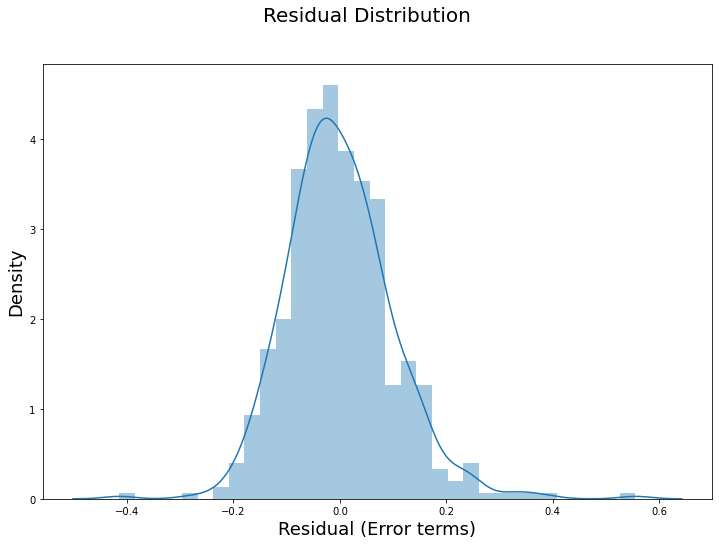

In [57]:
# Predict y_train
y_train_pred=lm.predict(X_train_lm)

# Calculate residuals
residual=y_train_pred - y_train

# Plot the histogram for the error terms
fig=plt.figure(figsize=(12,8))
sns.distplot(residual)
fig.suptitle('Residual Distribution',fontsize=20)
plt.xlabel('Residual (Error terms)',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.show()

**Conclusion**<br>
From the above graph, we can conclude that Residual Distribution (Error term) is normally distributed across 0. This means our model has handled assumption of error normal distribution properly.

#### Assumptions on Error Terms

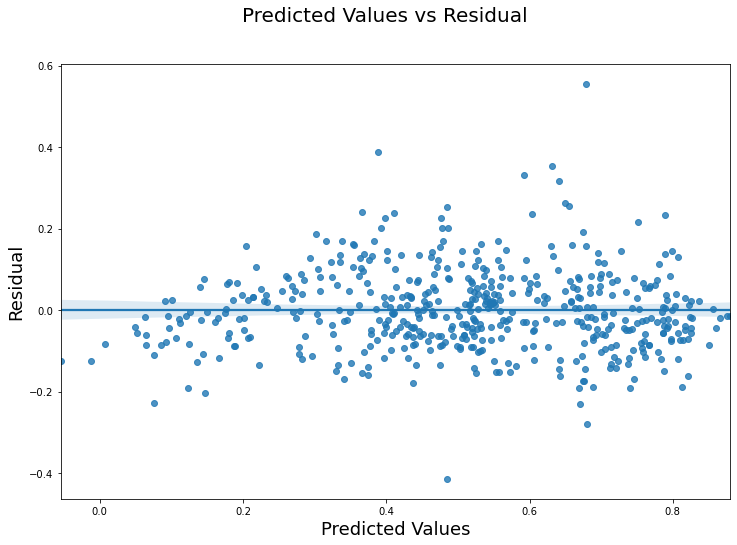

In [60]:
# Plot the regplot for Predicted Values vs Residual
fig=plt.figure(figsize=(12,8))
sns.regplot(x=y_train_pred, y=residual)
fig.suptitle('Predicted Values vs Residual',fontsize=20)
plt.xlabel('Predicted Values',fontsize=18)
plt.ylabel('Residual',fontsize=18)
plt.show()

**Conclusion**<br>
From the above graph, we can conclude that there is no relation between Predicted value and residual. This is inline with our expecttion.

#### Homoscedasticity

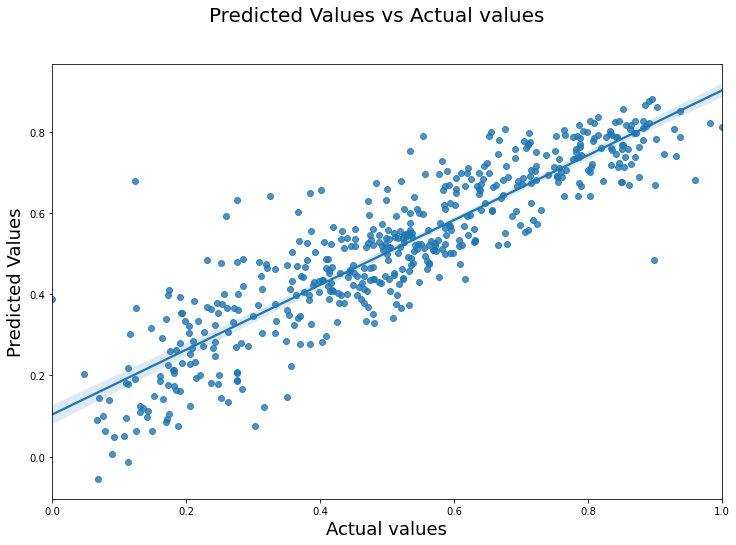

In [61]:
# Plot the regplot for Predicted Values vs Actual values
fig=plt.figure(figsize=(12,8))
sns.regplot(x=y_train, y=y_train_pred)
fig.suptitle('Predicted Values vs Actual values',fontsize=20)
plt.xlabel('Actual values',fontsize=18)
plt.ylabel('Predicted Values',fontsize=18)
plt.show()

**Conclusion**<br>
From the above graph, we can see that actual values are equally distributed across predicted line. 
This means there is equal variance. Hence, this proves homoscedasticity of residuals (error terms).

### Step 8.Predictions and Evaluation of the Model

We have fitted the model and calculate the error terms. Now lets make prediction using the final model

In [62]:
# Apply scaler to all numeric variables except dummy variables
num_varlist= ['cnt','temp','atemp','hum','windspeed']

# Fit Transform
df_test[num_varlist]=scaler.transform(df_test[num_varlist])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Sunday,weekday_Teusday,weekday_Thusday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,1,0,0,0


In [63]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Sunday,weekday_Teusday,weekday_Thusday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.072727,0.086364,0.086364,0.127273,0.145455,0.168182,0.163636,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.260281,0.281541,0.281541,0.334038,0.353363,0.374881,0.370789,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Splitting into X_test,y_test

In [64]:
y_test=df_test.pop('cnt')
X_test=df_test

In [65]:
# Filtering required columns in df X_test
X_test_new=X_test[X_train_rfe.columns]

# Adding constant variable to test dataset
X_test_new=sm.add_constant(X_test_new)

In [66]:
# Predicting Test Data using the developed model
y_test_pred=lm.predict(X_test_new)

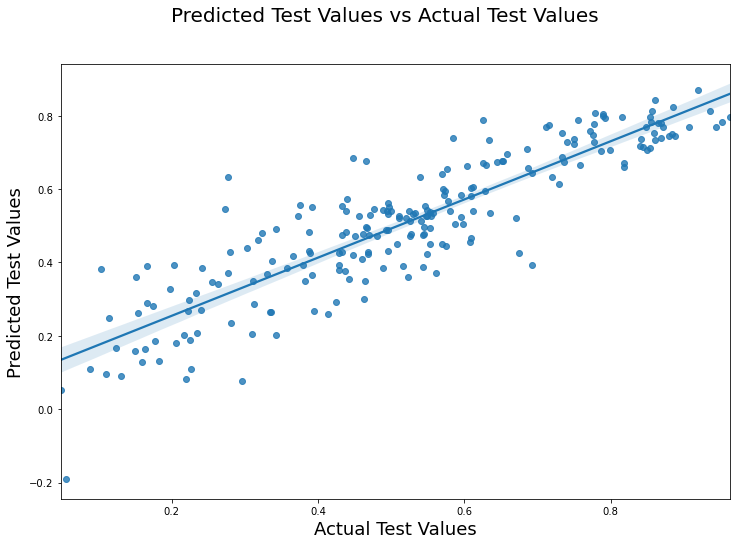

In [67]:
# Plot the regplot for Predicted Test Values vs Actual Test Values
fig=plt.figure(figsize=(12,8))
sns.regplot(x=y_test, y=y_test_pred)
fig.suptitle('Predicted Test Values vs Actual Test Values',fontsize=20)
plt.xlabel('Actual Test Values',fontsize=18)
plt.ylabel('Predicted Test Values',fontsize=18)
plt.show()

**Conclusion**<br>
 From the above graph, we can see that actual test values are equally distributed across predicted test line. This means there is equal variance. Hence, this proves homoscedasticity of residuals (error terms).

#### Model Evaluation

In [68]:
# Calculating R-square
r2_score(y_test,y_test_pred)

0.7844580042240872

In [70]:
# Calculating mean squared error
mean_squared_error(y_test,y_test_pred)

0.010305985231626253

In [73]:
# Evaluating correlation coefficient of predictors impacting target variable "cnt"
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient Value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient Value',ascending = False,inplace = True)
param

,Variables,Coefficient Value
index,,
0,const,0.592694
1,yr,0.245746
9,mnth_Sep,0.058189
5,season_Summer,-0.038469
10,weekday_Sunday,-0.052856
12,weathersit_Mist & Cloudy,-0.089313
2,holiday,-0.093719
8,mnth_Nov,-0.109239
6,mnth_Dec,-0.117286


**Conclusion**<br>
We can conclude that the linear equation of the best fitted line is as below:<br>
cnt=0.592694+(yr * 0.245746) + (mnth_Sep * 0.058189) + (season_Summer * -0.038469) + (weekday_Sunday * -0.052856) + (weathersit_Mist & Cloudy * -0.089313) + (holiday * -0.093719)+(mnth_Nov * -0.109239)+(mnth_Dec * -0.117286)+(mnth_Jan * -0.122473)+(windspeed * -0.191076)+(season_Spring * -0.236597)+(weathersit_Light Snow & Rain * -0.320761)

All the positive coefficients indicates that increase in these values would increase the cnt values
All the negtive coefficients indicates that increase in these values would decrease the cnt values

- Bike rentals are more in the month of September
- Rentals reduced during holidays
- Bike rentals are most affected by season and month